# Spam filter assignment

You are tasked with writing a spam filter. By the end of this document, you will write a function that takes in a string, and outputs a designation of the entire string as "1" (SPAM) or "0" (NOT SPAM). And you will use that function to test various classification algorithms on the data.

We will walk you through feature generation, but the choice of classifier and model tuning are up to you. You will optimize a number of models (see below). Classification performance on the test set will determine extra credit points.

In [2]:
# feel free to add other imports as necessary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn import cross_validation
from sklearn.model_selection import KFold

import os
os.chdir('C:/Users/Sharon/Desktop/Chapman Spring 2018/Data Mining CS 530/Homework/spam_data')

C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Feature generation

While not the most sophisticated approach, we will be using "spam-indicating" words to determine whether a document is spam or not.

We've compiled a list of "spam-indicating" words (https://blog.hubspot.com/blog/tabid/6307/bid/30684/the-ultimate-list-of-email-spam-trigger-words.aspx) compiled as "spam_words.txt" (suspicious title, I know). 


In [3]:
filename = "spam_words.txt"  # modify the path as needed
with open(filename) as f:
    spam_word_list = f.readlines()
    
spam_word_list = [x.strip().lower() for x in spam_word_list]  # remove newline characters

## Part 1: Text featurization

You will write a function to represent the document, the frequency, and occurence of each of the words in the word list.


In [4]:
def count_occurences(document, wordlist):
    """ This function will take in a document (string) 
    and count the number of times each element in wordlist occurs.
    inputs:
    -document: string
    -wordlist: list (i.e. spam_word_list from above)
    return: 
    -counts: array of len(wordlist) indicating the number of times each word
    of wordlist occurs in the document.
    """
    document = document.lower().strip()
    
    counts = []
    for word in wordlist:
        counts.append(document.count(word))
    ### 
    # useful built-in string functions: 
    # lower-case the document: .lower(), 
    # remove formatting characters: .strip()
    # number of times a substring occurs: .count()
    # YOUR CODE BELOW
    ###
    return counts

## Training data

There are two folders containing the text of emails. For simplicity, you just need to read in each file as a string (which will be featurized according to the feature generator for classification). You will also need to create a labels array, which will be 0 for every element in the "NOT SPAM" folder, and 1 for every email in the "SPAM" folder.

NOTE: you may need to convert these lists into numpy arrays depending on your implementation later

In [5]:
# feel free to make this more elegant
def load_data(spam_path, not_spam_path):
    """
    a function that takes the paths of the "spam" and "not_spam" folders, loads the emails and generates labels.
    NOTE: some emails have strange unicode formatting-- we include basic exception handling so you can ignore those files
    there will still be plenty of training examples
    inputs:
    -spam_path: path to spam folder
    -not_spam_path: path to not spam folder
    return:
    -emails: list of strings (each corresponding to a file)
    -labels: list of 0's (not spam) and 1's (spam)
    """
    emails = []
    labels = []
    for filename in os.listdir(spam_path):
        try:
            with open(os.path.join(spam_path, filename)) as f:
                emails.append(f.read())
            labels.append(1)
        except UnicodeDecodeError: # don't bother with ones that don't read in
            pass  
    
    for filename in os.listdir(not_spam_path):
        try:
            with open(os.path.join(not_spam_path, filename)) as f:
                emails.append(f.read())
            labels.append(0)
        except UnicodeDecodeError: # don't bother with ones that don't read in
            pass  
    return emails, labels

In [6]:
spam_path = 'C:/Users/Sharon/Desktop/Chapman Spring 2018/Data Mining CS 530/Homework/spam_data/spam'
not_spam_path = 'C:/Users/Sharon/Desktop/Chapman Spring 2018/Data Mining CS 530/Homework/spam_data/not_spam'

In [7]:
emails, y = load_data(spam_path, not_spam_path)

In [8]:
x=[]
for email in emails:
    x.append(count_occurences(email, spam_word_list))

In [9]:
X = np.asarray(x)
y = np.asarray(y)
X = StandardScaler().fit_transform(X)

C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Part 2: Selecting and optimizing models
In the section below, add as many cells as necessary to select your models and optimize their free parameters. Then, include final code to fit your models on all of the available training data. Your models can be either scikit-learn classifiers (i.e. "clf" as we've referred to in class) or sklearn pipelines that implement a .fit() and .predict() method.

Once you finish the above, your assignment is to create models for the following classification algorithms that we covered in class: 

1. LDA
2. Logistic Regression
3. Naive Bayes
4. kNN, 
5. one of the Tree-Based methods
6. SVM. 

### Fit each model in its own cell below. Then, complete the python dictionary below as {name of model: clf}

Try different parameters on your models. You can optimize the parameters using cross validation. 

You do not have to participate in the extra-credit competition below. Nevertheless, we will give full marks for this exercise only for models that classify better than chance on our test set (described in the extra-credit competition section below). If you suspect that one of your classifiers will not do better than chance, do not just submit it and hope for the best. Instead, include a short explanation about the reasons that you think that model will not be successful on our dataset, relating to things like the model's assumptions, specific characteristics of this type of dataset, and so on. A model that does not achieve better-than-chance performance but includes a clear and reasonable explanation of the reasons for that level of performance can achieve full marks. 
In a cell at the bottom of the notebook, discuss your findings about why certain classifiers work better than others. Relate that to the assumptions that different classifiers make and to what we learned regarding the relations between different classifiers.

In [10]:
# train your models here-- feel free to add additional cells

In [11]:
from sklearn.model_selection import KFold
n_folds = 10
kf = KFold(n_folds)  # 5 fold classification... just because.

In [11]:
#LDA
n_s = np.arange(1, 100)  # test k from 1 to 9

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
scores = []
for k in n_s:
    clf_n_scores = []
    for train, test in kf.split(X):
        lda = LinearDiscriminantAnalysis(n_components=k)
        lda.fit(X[train], y[train])
        clf_n_scores.append(lda.score(X[test], y[test]))
    
    scores.append(clf_n_scores)

scores = np.array(scores)
n_scores = scores.mean(axis=1)

C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


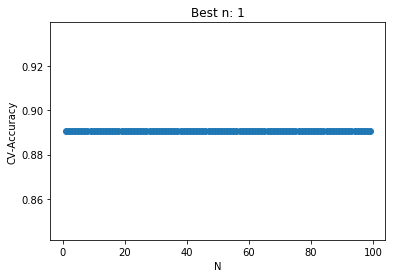

0.890581395349


In [12]:
plt.plot(n_s, n_scores, 'o-')
plt.ylabel("CV-Accuracy")
plt.xlabel("N")
best_n = n_s[np.argmax(n_scores)]
plt.title("Best n: {}".format(best_n))
plt.show()
print(np.max(n_scores))

In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_k_scores = []
for train, test in kf.split(X):
    logreg = LogisticRegression()
    logreg.fit(X[train], y[train])
    clf_k_scores.append(logreg.score(X[test], y[test]))

scores = np.array(clf_k_scores)
k_scores = scores.mean()
print(k_scores)

0.936458773784


In [14]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_k_scores = []
for train, test in kf.split(X):
    nb = GaussianNB()
    nb.fit(X[train], y[train])
    clf_k_scores.append(nb.score(X[test], y[test]))

scores = np.array(clf_k_scores)
k_scores = scores.mean()
print(k_scores)

0.821490486258


In [26]:
#k-NN
candidate_ks = np.arange(1, 100)

from sklearn.neighbors import KNeighborsClassifier
scores = []
for k in candidate_ks:
    this_k_scores = []
    for train, test in kf.split(X):
        this_knn = KNeighborsClassifier(k)
        this_knn.fit(X[train], y[train])
        this_k_scores.append(this_knn.score(X[test], y[test]))
            
    # this can be done in one line! see if you can figure this out.
#     this_fold_scores = [KNeighborsClassifier(k).fit(X[train], y[train]).score(X[test], y[test]) for k in candidate_ks]
    
    scores.append(this_k_scores)

scores = np.array(scores)
k_scores = scores.mean(axis=1)

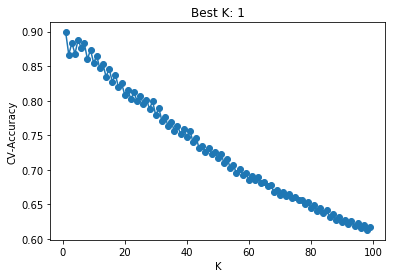

0.898985200846


In [27]:
plt.plot(candidate_ks, k_scores, 'o-')
plt.ylabel("CV-Accuracy")
plt.xlabel("K")
best_k = candidate_ks[np.argmax(k_scores)]
plt.title("Best K: {}".format(best_k))
plt.show()
print(np.max(k_scores))

In [17]:
#Random Forests
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

max_depth = 5
candidate_trees = np.arange(1, 100)
scores = []

for n_trees in candidate_trees:
    # we specify the max depth of each tree, as well as set the number of trees in our random forest
    ran_for = RandomForestClassifier(max_depth=max_depth, n_estimators=n_trees, max_features=1)
    scores.append(cross_val_score(ran_for, X, y, cv=kf))

scores = np.array(scores)
tree_scores = scores.mean(axis=1)

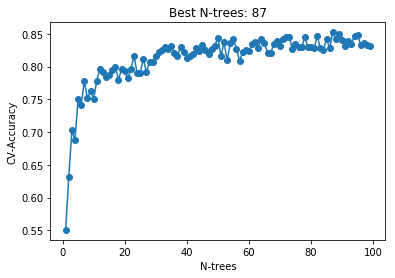

0.852325581395


In [18]:
plt.plot(candidate_trees, tree_scores, 'o-')
plt.ylabel("CV-Accuracy")
plt.xlabel("N-trees")
best_k = candidate_trees[np.argmax(tree_scores)]
plt.title("Best N-trees: {}".format(best_k))
plt.show()
print(np.max(tree_scores))

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
#SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# grid of parameters to be tested (can also be a list)
param_grid = {"C": np.logspace(-3, 3, 10), 
              "gamma": np.logspace(-3, 3, 10)}

# classifier to be tested
svm_rbf = SVC(kernel="rbf")

# create a grid object with k fold CV, testing the parameters above
grid = GridSearchCV(svm_rbf, cv=kf, param_grid=param_grid)

# fit the object
grid.fit(X, y)

In [20]:
grid.best_params_

{'C': 1000.0, 'gamma': 0.001}

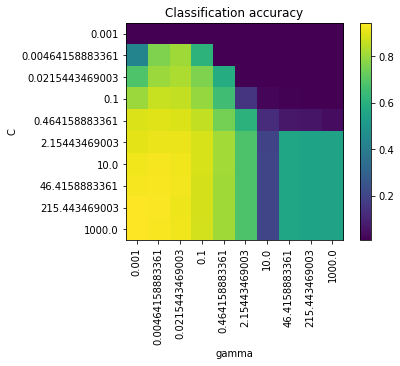

In [21]:
plt.imshow(grid.cv_results_["mean_test_score"].reshape(10, 10))
plt.xticks(np.arange(10), np.logspace(-3, 3, 10), rotation="vertical")
plt.xlabel("gamma")
plt.yticks(np.arange(10), np.logspace(-3, 3, 10))
plt.ylabel("C")
plt.title("Classification accuracy")
plt.colorbar()
plt.show()

In [25]:
print(np.max(grid.cv_results_['mean_test_score']))

0.943067033976


In [ ]:
# replace "None" with your model from above.

all_models = {"LDA": lda, 
              "Logistic Regression": logreg, 
              "Naive Bayes": nb, 
              "kNN": this_knn, 
              "Tree-based": ran_for, 
              "SVM": svm_rbf}

### Discussion

LDA: The linear discriminant analysis models did not peform well because it assumes the data has a multivariate gaussian distribution with equal variance. From the data that was collected, we understand that the data would not have a continuous distribution, and it would act more like categorial data. Linear discriminant analysis also works better when there are multi-classes, but in our case there were only 2 classes (spam/non-spam). Based on the data, logistic regression or SVMs would be a better model.

Logistic Regression: The logistic regression performs well with our data because we are categorizing it into 2 classes. There are only 2 categories in the dependent variable (spam/non-spam). Another advantage of using logistic regression is that does not require assumptions about normality.

Naive Bayes: The Naive Bayes analysis does not perform well, because of the underlying assumption that all variables are conditionally independent. Because certain spam words are highly correlated with one another, a model with the assumption of independence would not work well.

k_NN: K nearest neighbor analysis performed decently but not as well as logisitic regression or SVM because training that occurs for k-NN is minimal. It does the job in classifying and predicting, and it works with our data because it does not make any assumptions on the distribution of the data.

Random Forest: The random forest surprisingly did very poorly on the data. This is probably because random forests are used for multi-class problems, where we only have a class of 2.

SVM: SVMs performed the best. This makes sense because they can deal with data that are not completely linearly separable. It also works like an enhanced k nearest neighbor and logistic regression, which were the two models that performed best with the data.  It also performed well because SVMs are usually used to classify 2 classes, which is what we needed to accomplish in our case.

LDA: 0.890581395349
LOGREG: 0.936458773784
NaiveBayes: 0.821490486258
k-NN: 0.898985200846
RandomForest: 0.852325581395
SVM: 0.943067033976


## Part 3: Classification function
Write a classification function that takes in a string and classifies it as spam or not using a classifier clf. This function will need to take in a string, clean it as you did in training, featurize it, and run a prediction.

In [45]:
def classify_text(clf, document, wordlist):
    """
    a function to classify a string as spam or not
    inputs:
    -clf: trained classifier or pipeline
    -document: email as string 
    returns:
    -prediction (class label, int or float)
    """
    ### YOUR CODE HERE ###
    x = count_occurences(document, wordlist)
    prediction = clf.predict([x])
    
    
    return prediction

## Extra-credit 
We keep the ultimate test of your models for ourselves; you do not have access to this test set. But you can assume it is drawn from the same distribution as your dataset. It is therefore equivalent to the elusive "tomorrow' data". 

The performance of your model on the test set will determine extra-credit. The point breakdown will be as follows:

92-95%: 1pt

95-98%: 2pts

\>98%: 3pts

Each person can submit up to 3 models for the competition on top of the implementations of the various classifiers above. The 3 models need not use different machine-learning classifiers. They could even all be the same classifier with different parameters. Explain why you chose these 3 specific models for submission.

In [ ]:
# format this dictionary the same as above, except only choose the best 3.
best_models = {"Logistic Regression": logreg,  
              "kNN": this_knn, 
              "SVM": svm_rbf}

### Discussion

Explain why you chose these 3 specific models for submission.
The three models that I chose were the logistic regression model, the k-nearest neighbor model, and the support vector machine. I chose these 3 models because the data that we are testing needs to be categorized into two classes, they do not make any assumptions on the distribution of data, and it does not assume conditional independence. These models are different enough so that the likelihood for overfitting will lessen.  These 3 models also performed the best out of the 6 models that were tested.